In [1]:
import numpy as np
import tensorflow as tf

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import random
random.seed(42)

# Preparing the dataset

In [2]:
(x_train_def, y_train_def), (x_test_def, y_test_def) = tf.keras.datasets.fashion_mnist.load_data()

x_train_def = tf.constant(x_train_def)
y_train_def = tf.constant(y_train_def)
x_test_def = tf.constant(x_test_def)
y_test_def = tf.constant(y_test_def)

In [3]:
def keep_selected_classes(x, y, classes_to_keep):
    mask = tf.math.logical_or(*[y == c for c in classes_to_keep])
    x, y = x[mask], y[mask]
    y = tf.where(y == classes_to_keep[0], 0, 1)
    return x, y

classes_to_keep = (3, 5)
x_train, y_train = keep_selected_classes(x_train_def, y_train_def, classes_to_keep)
x_test, y_test = keep_selected_classes(x_test_def, y_test_def, classes_to_keep)

In [4]:
print('Length after / length before')
print('train', len(x_train) / len(x_train_def))
print(' test', len(x_test) / len(x_test_def))

print('========================')
print('Unique values after drop')
print('train', np.unique(y_train))
print(' test', np.unique(y_test))

Length after / length before
train 0.2
 test 0.2
Unique values after drop
train [0 1]
 test [0 1]


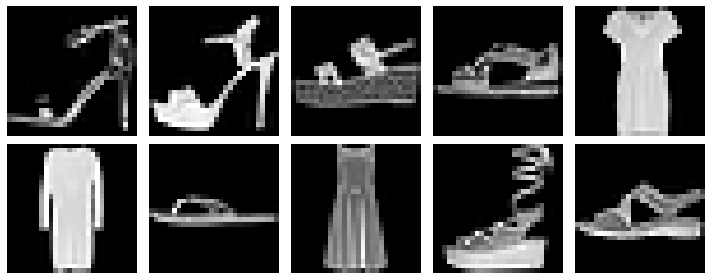

In [5]:
plt.rcParams['figure.figsize'] = [10, 4]

for i in range(1, 11):
    plt.subplot(2, 5, i)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    
plt.tight_layout()
plt.savefig('./plots/set_after_selection.jpg')
plt.show()

# Model

In [6]:
class LogisticRegressionModel(tf.keras.Model):
    
    def __init__(self):
        super().__init__()
        self.dense = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
    
    def call(self, inputs):
        # preprocessing
        x = tf.reshape(inputs, shape=[-1, 28 * 28]) # flatten
        x = tf.cast(x, dtype=tf.float32) / 255. # normalization
        
        # dense layer
        return self.dense(x)

In [7]:
model = LogisticRegressionModel()
y_pred = model.predict(x_train)
print('min: ', np.min(y_pred), ', max:', np.max(y_pred))
print(y_pred)

min:  0.06599948 , max: 0.65924966
[[0.28789622]
 [0.5167203 ]
 [0.307374  ]
 ...
 [0.40718693]
 [0.27952033]
 [0.48337868]]


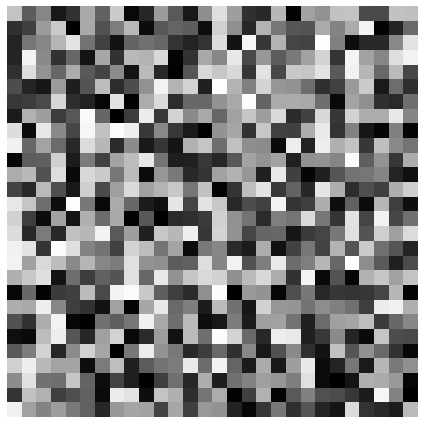

In [8]:
weights, _ = model.get_layer(index=0).weights
weights = tf.reshape(weights, shape=(28, 28))

plt.rcParams['figure.figsize'] = [6, 6]
plt.imshow(weights, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.savefig('./plots/start_weights.jpg')
plt.show()

# Fitting

In [9]:
model.compile(optimizer='SGD', loss='binary_crossentropy')
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
375/375 [==============================] - 0s 420us/step - loss: 0.1318
Epoch 2/15
375/375 [==============================] - 0s 401us/step - loss: 0.0450
Epoch 3/15
375/375 [==============================] - 0s 406us/step - loss: 0.0325
Epoch 4/15
375/375 [==============================] - 0s 422us/step - loss: 0.0267
Epoch 5/15
375/375 [==============================] - 0s 401us/step - loss: 0.0231
Epoch 6/15
375/375 [==============================] - 0s 398us/step - loss: 0.0207
Epoch 7/15
375/375 [==============================] - 0s 398us/step - loss: 0.0188
Epoch 8/15
375/375 [==============================] - 0s 401us/step - loss: 0.0174
Epoch 9/15
375/375 [==============================] - 0s 401us/step - loss: 0.0163
Epoch 10/15
375/375 [==============================] - 0s 398us/step - loss: 0.0153
Epoch 11/15
375/375 [==============================] - 0s 404us/step - loss: 0.0145
Epoch 12/15
375/375 [==============================] - 0s 398us/step - loss: 0.0138
E

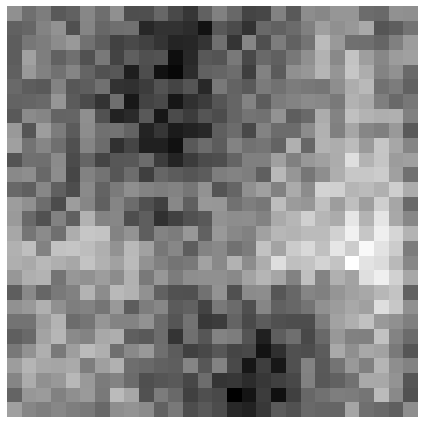

In [10]:
weights, _ = model.get_layer(index=0).weights
weights = tf.reshape(weights, shape=(28, 28))

plt.rcParams['figure.figsize'] = [6, 6]
plt.imshow(weights, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.savefig('./plots/end_weights.jpg')
plt.show()

TRAIN SET
true labels: [0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1]
  predicted: [0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1]


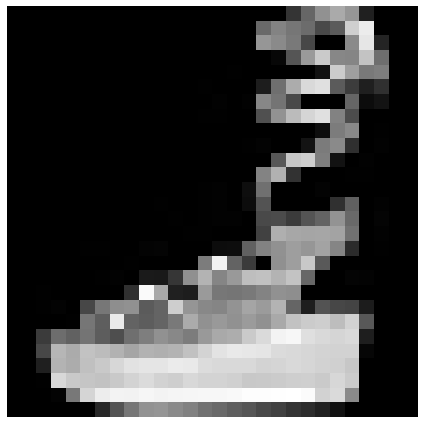

In [11]:
print('TRAIN SET')
y_pred = model.predict(x_train)
print('true labels:', y_train.numpy()[:20])
print('  predicted:', np.around(y_pred[:20].reshape((20))).astype(int))

plt.imshow(x_train[9], cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.savefig('./plots/difficult_sandal.jpg')
plt.show()

In [12]:
print('TEST SET')
y_pred = model.predict(x_test)
print('true labels:', y_test.numpy()[:20])
print('  predicted:', np.around(y_pred[:20].reshape((20))).astype(int))

TEST SET
true labels: [1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1]
  predicted: [1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1]
